In [1]:
# Cell 1 - Imports libraries and bacis config.

# Cell 1: imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Small plot settings
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

import textblob
try:
    from textblob import download_corpora
    download_corpora.download_all()
except Exception as e:
    print("TextBlob corpora download step:", e)
print("NLTK & TextBlob download done")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Love\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C

NLTK & TextBlob download done


[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
# Cell 2 - Load Dataset
import pandas as pd   
import os             

path = r"C:\Users\Love\Desktop\NLP_Sentiment_Analysis\Sentiment dataset.csv"

if os.path.exists(path):
    df = pd.read_csv(path)
    display(df.head())  
else:
    print("File not found — check the path again.")


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Cell 3 - Choose text column and basic inspect
text_col = 'Text'
if text_col not in df.columns:
    print("Columns found:", df.columns.tolist())
    raise ValueError(f"Column '{text_col}' not in dataframe. Change text_col variable.")

print("Total rows:", len(df))
print("Nulls in text col:", df[text_col].isna().sum())
df = df.dropna(subset=[text_col]).reset_index(drop=True)
print("After dropping NA rows:", len(df))
df[text_col] = df[text_col].astype(str)
df.head()

Total rows: 732
Nulls in text col: 0
After dropping NA rows: 732


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
# Cell 4 - Cleaning Functions
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\s+|www.\s+', '', text)
    text = re.sub(r'[^a-z0-9\s]',  ' ',  text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenize_and_lemmatizer(text):
    tokens = nltk.word_token(text)
    tokens = [t for t in tokens if t not in stop_words and len(t)>1 and not t.isdigit()]
    lemmas = [lemmatizer.lemmatizer(t) for t in tokens]
    return lemmas

sample =  df[text_col].iloc[0]
print("Original:", sample)
c = clean_text(sample)
print("Cleaned:", c)
print("Tokens + Lemmmas:", tokenize_and_lemmatize(c)[:20])

Original:  Enjoying a beautiful day at the park!              
Cleaned: enjoying a beautiful day at the park
Tokens + Lemmmas: ['enjoying', 'beautiful', 'day', 'park']


In [7]:
text_col = "Text"
sample = df[text_col].iloc[0]

print("Original:", sample)
c = clean_text(sample)
print("Cleaned:", c)
print("Tokens + Lemmas:", tokenize_and_lemmatize(c)[:20])


Original:  Enjoying a beautiful day at the park!              
Cleaned: enjoying a beautiful day at the park
Tokens + Lemmas: ['enjoying', 'beautiful', 'day', 'park']


In [8]:
# Cell 5 - Apply cleaning and tokens 
df['clean_text'] = df[text_col].apply(clean_text)
df['tokens'] = df['clean_text'].apply(tokenize_and_lemmatize)
df[[text_col, 'clean_text', 'tokens']].head(3)


,Text,clean_text,tokens
0,Enjoying a beautiful day at the park! ...,enjoying a beautiful day at the park,"[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,traffic was terrible this morning,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,just finished an amazing workout,"[finished, amazing, workout]"


In [11]:
# Cell 6 - Word frequency overall + top words
from collections import Counter
all_tokens = [t for tokens in df['tokens'] for t in tokens]
counter = Counter(all_tokens)
top_words = counter.most_common(30)
pd.DataFrame(top_words, columns=['word', 'count']).head(15)

,word,count
0,new,43
1,life,38
2,day,29
3,joy,29
4,dream,28
5,feeling,27
6,moment,27
7,like,27
8,friend,26
9,heart,26


In [12]:
# Cell 7 - Sentiment scoring: TextBlob polarity & subjectivity
def tb_sentiment(text):
    tb = TextBlob(text)
    return tb.polarity, tb.subjectivity

df[['tb_polarity', 'tb_subjectivity']] = df['clean_text'].apply(lambda x: pd.Series(tb_sentiment(x)))
df[['tb_polarity','tb_subjectivity']].describe()

,tb_polarity,tb_subjectivity
count,732.000000,732.000000
mean,0.096452,0.349482
std,0.301242,0.341459
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.300000
75%,0.250000,0.600000
max,1.000000,1.000000


In [13]:
# Cell 8 - Sentiment category from polarity
def label_from_polarity(p):
    if p > 0.1:
        return 'positive'
    elif p < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['tb_sentiment'] = df['tb_polarity'].apply(label_from_polarity)
df['tb_sentiment'].value_counts()

tb_sentiment
neutral     389
positive    246
negative     97
Name: count, dtype: int64

In [14]:
# Cell 9 - Sentiment via NLTK VADER it is good for short social media text
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def vader_label(c):
    if c >= 0.05:
        return 'positive'
    elif c <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_compound'].apply(vader_label)
df['vader_sentiment'].value_counts()

vader_sentiment
positive    468
negative    184
neutral      80
Name: count, dtype: int64

In [15]:
# Cell 10 - Compare TextBlob vs VADER
comp = pd.crosstab(df['tb_sentiment'], df['vader_sentiment'])
comp

vader_sentiment,negative,neutral,positive
tb_sentiment,,,
negative,57,7,33
neutral,113,55,221
positive,14,18,214


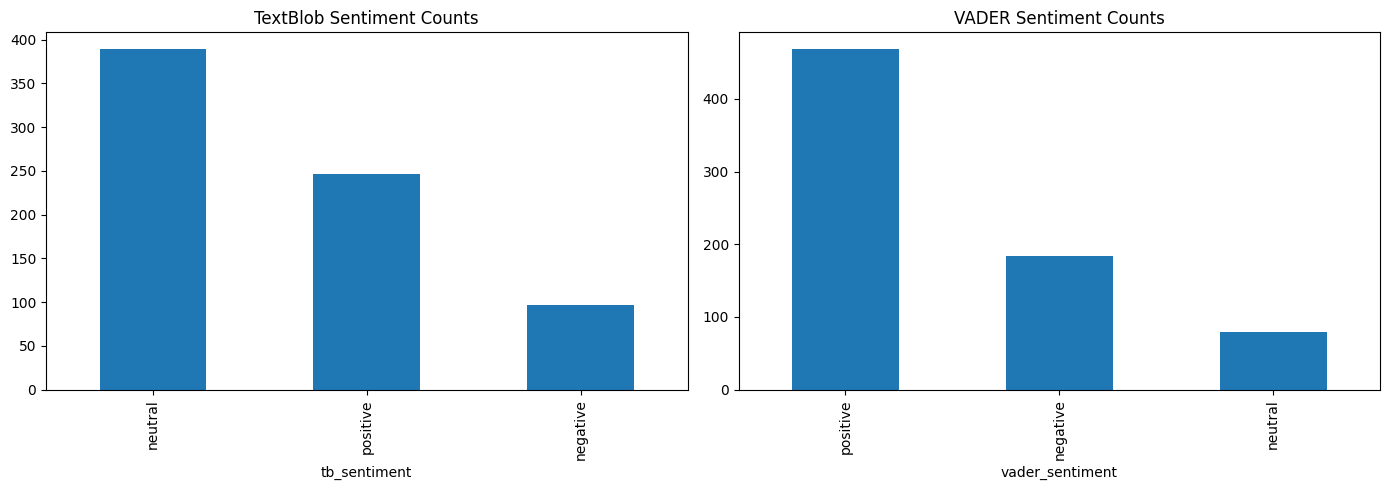

In [16]:
# Cell 11 - Plot sentiment distribution
fig, axes = plt.subplots(1,2, figsize=(14,5))
df['tb_sentiment'].value_counts().plot(kind='bar', ax=axes[0], title='TextBlob Sentiment Counts')
df['vader_sentiment'].value_counts().plot(kind='bar', ax=axes[1], title='VADER Sentiment Counts')
plt.tight_layout()
plt.show()

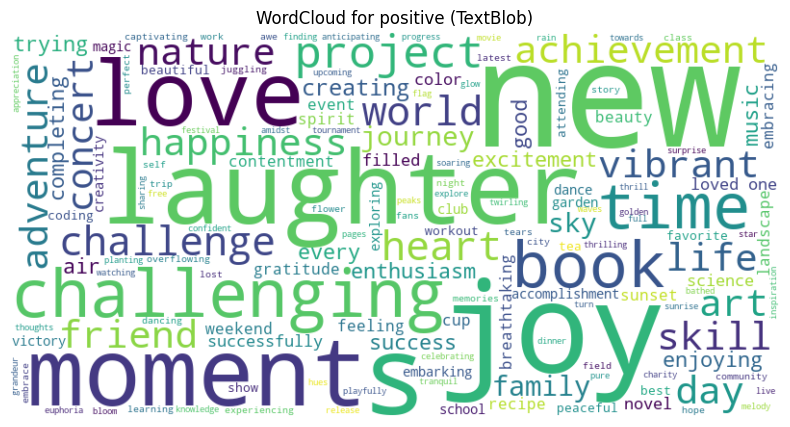

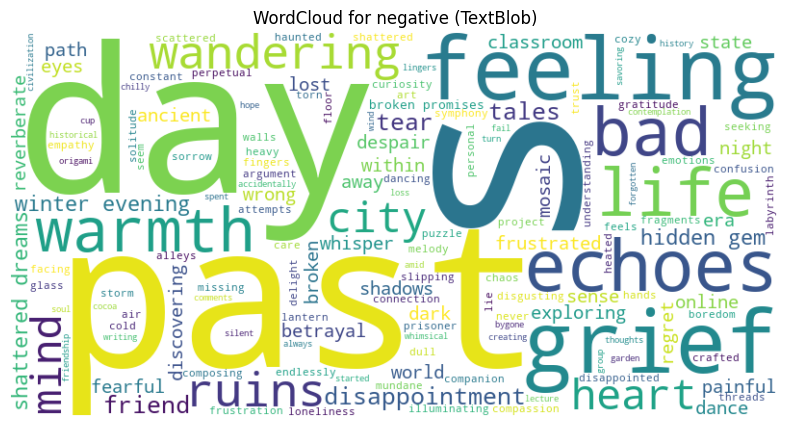

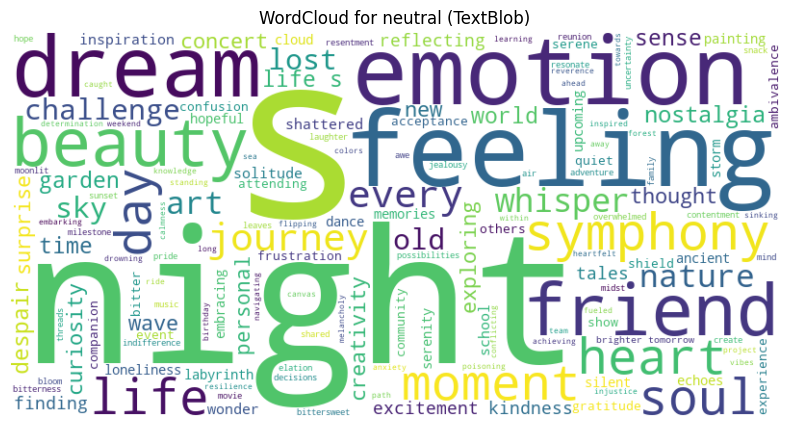

In [17]:
# Cell 12 - WordCloud by sentiment (positive/negative/neutral using TextBlob labels)
sentiments = ['positive','negative','neutral']
for s in sentiments:
    text_join = " ".join(df.loc[df['tb_sentiment']==s, 'clean_text'].astype(str).tolist())
    if len(text_join.strip())==0:
        print(f"No text for {s}")
        continue
    wc = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(text_join)
    plt.figure(figsize=(12,5))
    plt.title(f"WordCloud for {s} (TextBlob)")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [18]:
# Cell 13 - Top words per sentiment
def top_n_words_for_sentiment(sent_label, n=20):
    tokens = [t for tokens in df.loc[df['tb_sentiment']==sent_label,'tokens'] for t in tokens]
    return Counter(tokens).most_common(n)

for s in sentiments:
    print(f"Top words for {s}:")
    print(top_n_words_for_sentiment(s, 15))
    print('-'*40)

Top words for positive:
[('new', 34), ('joy', 24), ('laughter', 15), ('moment', 13), ('love', 12), ('challenging', 11), ('book', 10), ('time', 10), ('project', 9), ('challenge', 9), ('world', 9), ('heart', 9), ('day', 8), ('friend', 8), ('happiness', 8)]
----------------------------------------
Top words for negative:
[('day', 8), ('past', 8), ('feeling', 7), ('grief', 7), ('echo', 7), ('life', 6), ('broken', 6), ('shattered', 6), ('dream', 6), ('bad', 6), ('hidden', 5), ('warmth', 5), ('like', 5), ('wandering', 5), ('ruin', 5)]
----------------------------------------
Top words for neutral:
[('life', 24), ('dream', 21), ('night', 17), ('like', 16), ('feeling', 15), ('emotion', 15), ('friend', 14), ('beauty', 14), ('symphony', 14), ('day', 13), ('moment', 13), ('heart', 13), ('soul', 13), ('personal', 12), ('journey', 12)]
----------------------------------------


Saved results to sentiment_results.csv
Saved plot tb_sentiment_counts.png


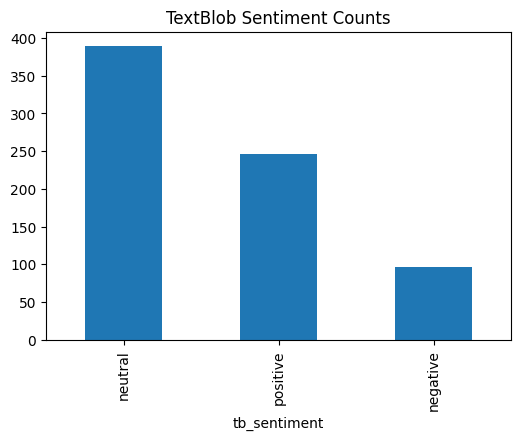

In [19]:
# Cell 14 - Save results to CSV & save figures
out_file = "sentiment_results.csv"
df.to_csv(out_file, index=False)
print("Saved results to", out_file)

# Save a sample plot to file example (TextBlob distribution)
plt.figure(figsize=(6,4))
df['tb_sentiment'].value_counts().plot(kind='bar', title='TextBlob Sentiment Counts')
plt.savefig("tb_sentiment_counts.png", bbox_inches='tight')
print("Saved plot tb_sentiment_counts.png")